MI estimate the mutal information for a discrete target variable

MI between two variable is a non-negative value which measures the dependency between the variables.

MI is zero if and only if two random variable is independent and higher values means higher dependency

In [3]:
import zipfile

In [13]:
with zipfile.ZipFile('winedatasetzip.zip','r') as zip_ref:
    zip_ref.extractall()

In [14]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt

In [18]:
df=pd.read_csv('winedata/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [19]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [21]:
x=df.drop(labels=['Wine'],axis=1)
y=df['Wine']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=0)

### Determining mutual information

In [26]:
from sklearn.feature_selection import mutual_info_classif

In [28]:
mutal_info=mutual_info_classif(x_train,y_train)
mutal_info

array([0.42196056, 0.30497449, 0.16914064, 0.23808852, 0.15860012,
       0.46346987, 0.7149081 , 0.10799128, 0.26754969, 0.61559454,
       0.52458359, 0.54430343, 0.52620088])

In [34]:
mutal_info=pd.DataFrame(mutal_info)
mutal_info.index=x_train.columns
mutal_info.sort_values(ascending=False,by=0)

,0
Flavanoids,0.714908
Color.int,0.615595
OD,0.544303
Proline,0.526201
Hue,0.524584
Phenols,0.463470
Alcohol,0.421961
Malic.acid,0.304974
Proanth,0.267550
Acl,0.238089


<AxesSubplot:>

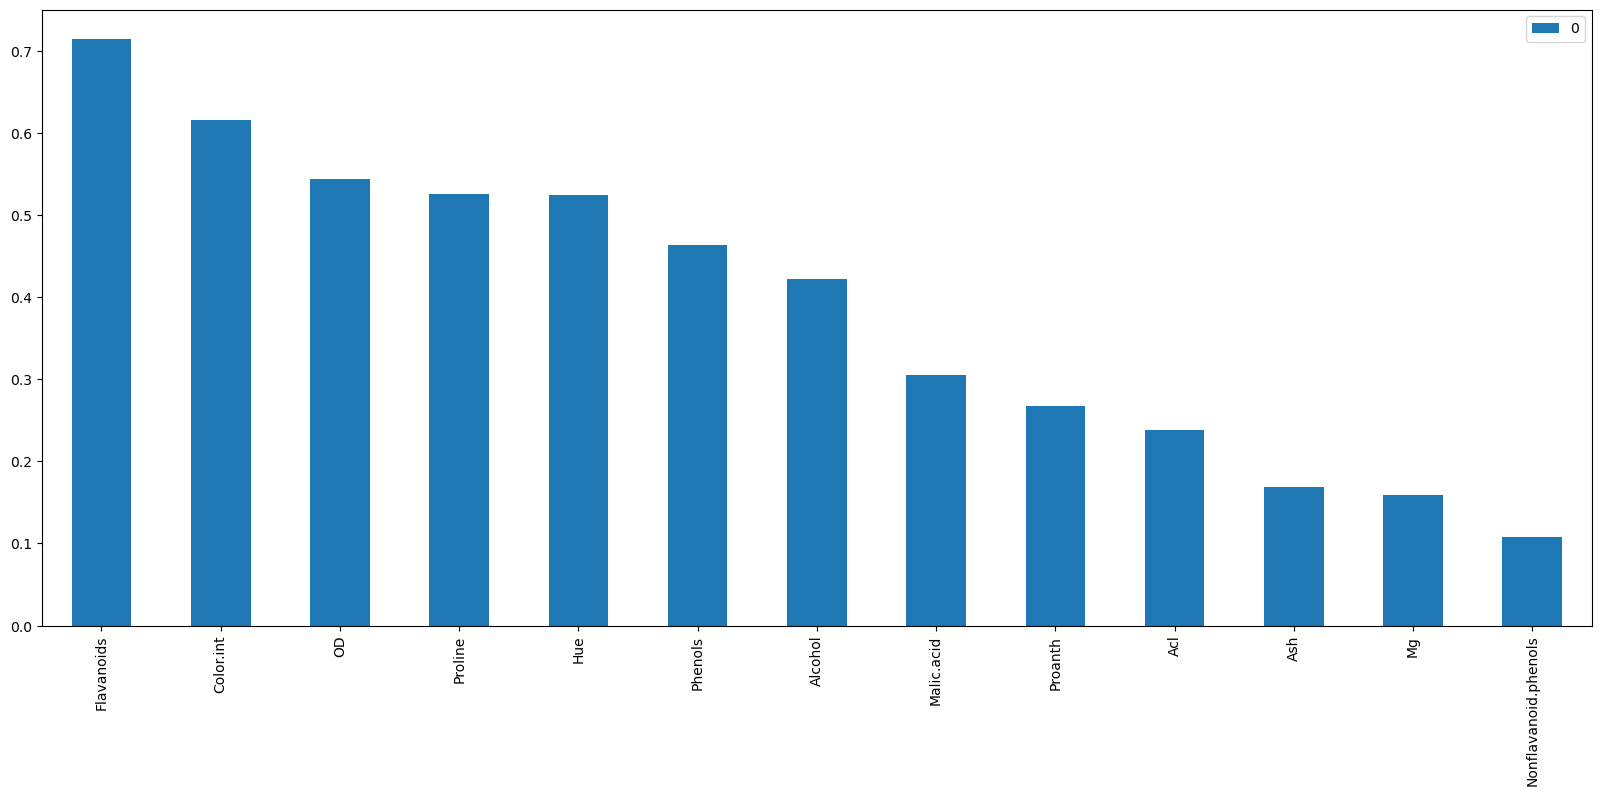

In [42]:
mutal_info.sort_values(ascending=False,by=0).plot.bar(figsize=(20,8))

here we can see which one is important feature and which one is least important

In [43]:
# now let take out the 10 important feature for creating a model

In [46]:
from sklearn.feature_selection import SelectKBest

In [50]:
sel_ten_columns=SelectKBest(mutual_info_classif,k=10)
sel_ten_columns.fit(x_train,y_train)
x_train.columns[sel_ten_columns.get_support()]

Index(['Alcohol', 'Malic.acid', 'Acl', 'Phenols', 'Flavanoids', 'Proanth',
       'Color.int', 'Hue', 'OD', 'Proline'],
      dtype='object')